# Resumo



No cotidiano de um analista de suporte, as demandas são gerenciadas por meio de chamados, que servem como um sistema de controle para registrar e resolver problemas. Esses chamados geralmente envolvem erros no sistema ou solicitações de auxílio para realizar determinadas tarefas.

Como os chamados representam uma grande parcela do trabalho de um analista de suporte, a automatização da análise e das respostas pode reduzir significativamente o tempo gasto em cada tarefa, aumentando a eficiência e a produtividade.

Nesse contexto, este projeto tem como objetivo criar um modelo que sugira respostas para chamados abertos com base em chamados antigos, utilizando aprendizado de máquina.
 

# Contextualização

Atualmente, trabalho como Analista de Suporte, e este projeto foi desenvolvido para atender à minha necessidade de responder chamados de forma mais ágil e eficiente. O modelo foi criado utilizando um histórico de chamados que atendi ao longo de 5 anos, o que me proporcionou uma base de dados robusta e diversificada.

Durante esse período, percebi que muitos chamados compartilham palavras-chave recorrentes, como "parcelamento", "englobamento", "cancelamento", entre outras. Essas palavras-chave estão frequentemente associadas a problemas e soluções específicas, o que sugere a possibilidade de automatizar a identificação de padrões e a geração de respostas.

A ideia central do projeto é analisar as palavras que mais se repetem nos chamados e, com base nelas, criar um modelo que identifique soluções aplicadas em casos semelhantes, e comparar com modelos prontos que prometem os mesmos resultados. Dessa forma, sempre que um novo chamado for aberto, o modelo poderá verificar chamados antigos semelhantes e sugerir as soluções mais adequadas, agilizando o processo de atendimento.

In [4]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [111]:
base = pd.read_excel('chamados.xlsx')

In [112]:
base

,id,descricao,solicitante,data_solicitacao,numero_chamado,observacao,status,como_foi_resolvido
0,1,Erro ao estornar parcelamento - erro de saldo,Carmen,2018-05-14 00:00:00,NaN,NaN,finalizado,Na mensagem de erro deve-se anotar os valores ...
1,2,Erro ao desenglobar - erro de tributo,Carmen,2018-05-14 00:00:00,NaN,NaN,finalizado,Me informa o lançamento e o tributo que está c...
2,3,corrigir o relatório de compensação de valores,Flavio,2018-05-14 00:00:00,362020,NaN,finalizado,Para realizar ajuste de relatório se possível ...
3,4,Ajustar layout do carnê de parcelamento para ...,Marlene,2018-05-14 00:00:00,362046,NaN,finalizado,Para realizar ajuste de relatório se possível ...
4,5,Alterar data de vencimento de um lançamento tr...,Carol,2018-05-14 00:00:00,NaN,NaN,finalizado,Primeiro consulta o extrato de débito do cadas...
...,...,...,...,...,...,...,...,...
1132,1133,Verificar a possibilidade de alterar as config...,Maristela,29/09/2023,NaN,NaN,finalizado,Poderia vincular o lançamento em outra sub-rec...
1133,1134,Verificar como gerar um relatório igual dos ma...,Carmen,29/09/2023,NaN,NaN,finalizado,Foi sugerido fazer pelo relatório de situação ...
1134,1135,Como alterar o valor do tributo referente a um...,Maquely,29/09/2023,NaN,NaN,finalizado,Arrecadação » Consultas » Lançamento Tributári...
1135,1136,Erro ao alterar forma de pagamento,Camila,29/09/2023,NaN,NaN,finalizado,Estornado a inscrição em divida ativa


# Seleção de Dados

A base de dados utilizada neste projeto é composta pelas seguintes variáveis:

ID : Identificador do chamado

Descricao: Texto onde é informado o problema enfrentado deste chamado.

Solicitante: Quem solicitou o chamado.

Data_solicitação: O dia em que o chamado foi aberto.

nummero_chamado: Número de controle de quando é aberto um chamado para central

Status: qual o status do chamado, podendo ser atribuido uma dos quatro item da lista (verificar, aguardando cliente, aguardando IPM, finalizado).

como_foi_resolvido: Descrição de como a situação foi resolvida (quando disponível).

Os campos de numero_chamado e como_foi_resolvido, não é obrigatório, por conta disso haverá chamados onde não possuem essas informações, além disso existe algns chamados que foram resolvidos utilizando notas técnicas que não tenho acesso para torna-las públicas, por conta disso tive que remover desse portifólio.

# Pré processamento e Formatação

A variável Descrição da solicitação foi processada para extrair palavras-chave relevantes, transformando-a em várias variáveis quantitativas. Essas palavras-chave foram selecionadas com base na sua recorrência e importância para o contexto dos chamados, como "parcelamento", "englobamento", "cancelamento", entre outras.

Essa transformação permite que a descrição textual seja convertida em um formato numérico, adequado para a aplicação de algoritmos de aprendizado de máquina, como o KNN (K-Nearest Neighbors).

Para verificar as palavras recorrentes foi realizado uma analise descritiva

# Mineração de dados

Nessa etapa foi escolhido doi algoritmo para realizar a tarefa de encontrar um chamado similar ao chamado aberto, foi utilizado KNN usando algumas palavras chaves para fazer a seleção de chamado similar e posteriormente foi utilizado o modelo DF-IDF aplicado na descrição do chamado, ou seja sem definir palavar chaves.

Para definir as palavras chaves para a aplicação do KNN antes foi realizado uma análise exploratória

# Analise das palavras que mais repetem

In [ ]:
from collections import Counter

In [113]:
desc = base['descricao']
all_words = " ".join(desc).lower() # Junta todas as linhas em uma única string
words = all_words.split() # Divide as palavras
word_count = Counter(words) # Conta as palavras
most_common_words = word_count.most_common(150)  # Top 150 palavras mais frequentes
print("Palavras mais comuns:", most_common_words)

Palavras mais comuns: [('de', 624), ('o', 279), ('para', 259), ('a', 215), ('do', 210), ('erro', 157), ('como', 155), ('não', 134), ('e', 133), ('no', 127), ('um', 122), ('-', 111), ('verificar', 111), ('da', 106), ('que', 104), ('ao', 97), ('em', 95), ('lançamento', 87), ('com', 81), ('na', 75), ('cadastro', 73), ('problema', 69), ('layout', 68), ('parcelamento', 66), ('pagamento', 65), ('os', 65), ('gerar', 64), ('alterar', 63), ('incluir', 62), ('uma', 53), ('fazer', 53), ('relatorio', 46), ('cancelar', 46), ('divida', 46), ('itbi', 45), ('cancelamento', 43), ('corrigir', 42), ('dos', 42), ('valores', 40), ('valor', 40), ('chamado', 38), ('as', 37), ('realizar', 37), ('ajustar', 35), ('sub-receita', 35), ('abrir', 34), ('auxilio', 33), ('cda', 33), ('processo', 33), ('ver', 33), ('relatório', 32), ('por', 32), ('débito', 31), ('está', 30), ('forma', 29), ('tem', 29), ('contribuinte', 29), ('isenção', 28), ('foi', 27), ('estornar', 25), ('compensação', 24), ('se', 24), ('referente', 

Após a análise das palavras que mais se repetem, foi descartado as que não possuiam um significado técnico, restando assim 51 palavras, para aplicar o KNN essas variaveis foram transformadas em quantitativa, Sendo cada variavel a contage de vezes que essa se repete em cada atributo.

In [11]:
repeti = [('erro', 157), ('como', 155), ('verificar', 111), ('lançamento', 87), ('cadastro', 73), ('problema', 69), ('layout', 68), ('parcelamento', 66), ('pagamento', 65), ('gerar', 64), ('alterar', 63), ('incluir', 62), ('relatorio', 46), ('cancelar', 46), ('divida', 46), ('itbi', 45), ('cancelamento', 43), ('corrigir', 42), ('valores', 40), ('valor', 40), ('sub-receita', 35), ('cda', 33), ('processo', 33), ('relatório', 32), ('débito', 31), ('isenção', 28), ('estornar', 25), ('compensação', 24), ('registro', 24), ('alteração', 24), ('judicial', 23), ('lote', 22), ('alvara', 22), ('data', 21), ('configurar', 21), ('desenglobar', 19), ('tributo', 19), ('extrato', 18), ('planilhamento', 17), ('relatorios', 17), ('restituição', 15), ('economico', 15), ('calculo', 14), ('aberto', 14), ('lançamentos', 14), ('am', 14), ('vencimento', 12), ('ativa', 12), ('pago', 11), ('portal', 11), ('pix', 11)]
len(repeti)

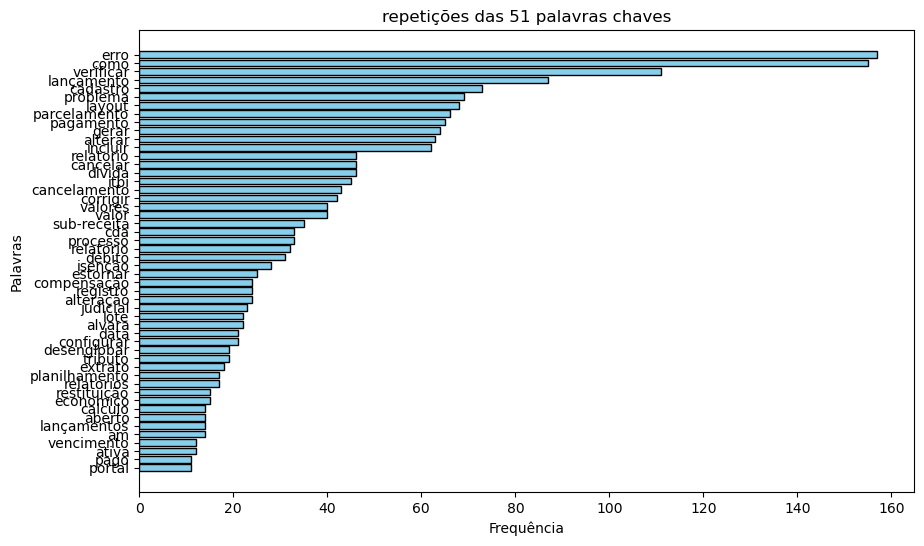

In [14]:
repeti = sorted(repeti, key=lambda x: x[1], reverse=True)[:50]

# Separando as palavras e suas contagens
palavras, contagens = zip(*repeti)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.barh(palavras, contagens, color='skyblue', edgecolor='black')

# Invertendo a ordem para que a maior frequência fique no topo
plt.gca().invert_yaxis()

# Adicionando rótulos e título
plt.xlabel('Frequência')
plt.ylabel('Palavras')
plt.title('repetições das 51 palavras chaves')

# Exibir o gráfico
plt.show()

In [10]:
def contar_erros(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('erro')
def contar_cadastro(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('cadastro')
def contar_incluir(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('incluir')
def contar_gerar(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('gerar')
def contar_layout(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('layout')
def contar_corrigir(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('corrigir')
def contar_relatorio(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('relatório')
def contar_cda(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('cda')
def contar_processo(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('processo')
def contar_desenglobamento(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\benglo\w*\b', descricao.lower()))
def contar_estorno(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\bestorn\w*\b', descricao.lower()))
def contar_saldo(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('cda')
def contar_cancelamento(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\bcancela\w*\b', descricao.lower()))
def contar_parcelamento(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('parcelamento')
def contar_restituicao(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\brestitui\w*\b', descricao.lower()))
def contar_compensacao(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\bcompens\w*\b', descricao.lower()))
def contar_isencao(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\bisen\w*\b', descricao.lower()))
def contar_acesso(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('itbi')
def contar_dividaativa(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('divida')
def contar_pagamento(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\bpag\w*\b', descricao.lower()))
def contar_vencimento(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('vencimento')
def contar_zerado(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\bzer\w*\b', descricao.lower()))
def contar_lancamento(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('lançamento')
def contar_receita(descricao):
    if pd.isna(descricao):
        return 0
    return descricao.lower().split().count('receita')
def contar_planilha(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\bplanilhan\w*\b', descricao.lower()))
def contar_valor(descricao):
    if pd.isna(descricao):
        return 0
    return len(re.findall(r'\bvalorn\w*\b', descricao.lower()))

In [114]:
df = base

In [115]:

# Adiciona uma nova coluna com a contagem de erros
df['erro'] = df['descricao'].apply(contar_erros)
df['layout'] = df['descricao'].apply(contar_layout)
df['corrigir'] = df['descricao'].apply(contar_receita)
df['desenglobar'] = df['descricao'].apply(contar_desenglobamento)
df['estorno'] = df['descricao'].apply(contar_estorno)
df['cancela'] = df['descricao'].apply(contar_cancelamento)
df['saldo'] = df['descricao'].apply(contar_saldo)
df['compensação'] = df['descricao'].apply(contar_compensacao)
df['restituição'] = df['descricao'].apply(contar_restituicao)
df['isenção'] = df['descricao'].apply(contar_isencao)
df['acesso'] = df['descricao'].apply(contar_acesso)
df['Divida Ativa'] = df['descricao'].apply(contar_dividaativa)
df['pagamento'] = df['descricao'].apply(contar_pagamento)
df['vencimento'] = df['descricao'].apply(contar_vencimento)
df['zerado'] = df['descricao'].apply(contar_zerado)
df['lançamento'] = df['descricao'].apply(contar_lancamento)
df['relatório'] = df['descricao'].apply(contar_relatorio)
df['parcelamento'] = df['descricao'].apply(contar_parcelamento)
df['cadastro'] = df['descricao'].apply(contar_cadastro)
df['gerar'] = df['descricao'].apply(contar_gerar)
df['incluir'] = df['descricao'].apply(contar_incluir)
df['corrigir'] = df['descricao'].apply(contar_corrigir)
df['valor'] = df['descricao'].apply(contar_valor)
df['cda'] = df['descricao'].apply(contar_cda)
df['processo'] = df['descricao'].apply(contar_processo)
df['planilha'] = df['descricao'].apply(contar_planilha)
df['zerado'] = df['descricao'].apply(contar_zerado)
df['lançamento'] = df['descricao'].apply(contar_lancamento)
df['relatório'] = df['descricao'].apply(contar_relatorio)
df['parcelamento'] = df['descricao'].apply(contar_parcelamento)

Algumas palavras chaves erram repetidas, por exemplo "valor" e "valores", sendo assim foi mantidas apenas uma delas, desse modo restaram ** variaveis

In [116]:
tab = df.drop(columns=['id','solicitante','data_solicitacao','numero_chamado', 'observacao', 'status'])
df = tab.drop(columns=['descricao','como_foi_resolvido'])
df

,erro,layout,corrigir,desenglobar,estorno,cancela,saldo,compensação,restituição,isenção,...,lançamento,relatório,parcelamento,cadastro,gerar,incluir,valor,cda,processo,planilha
0,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1133,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1134,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1135,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Na sequencia foi feito um teste onde o novo chamado fosse igual ao chamado '900' e aplicado o knn para ver quais os 5 chamados mais parecidos.

In [117]:
# Nova linha a ser comparada
nova_linha = df.iloc[[900]]
nova_linha

,erro,layout,corrigir,desenglobar,estorno,cancela,saldo,compensação,restituição,isenção,...,lançamento,relatório,parcelamento,cadastro,gerar,incluir,valor,cda,processo,planilha
900,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:

# Configuração do modelo KNN
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')  # 5 vizinhos mais próximos
knn.fit(df)



NearestNeighbors(metric='euclidean')

In [119]:
# Encontrar as linhas mais próximas da nova linha
distancias, indices = knn.kneighbors(nova_linha)

# Mostrar os índices e distâncias das linhas mais parecidas
print("Índices das linhas mais parecidas:", indices[0])
print("Distâncias para as linhas mais parecidas:", distancias[0])

# Mostrar as linhas mais parecidas
linhas_mais_parecidas = df.iloc[indices[0]]
print("\nLinhas mais parecidas com a nova linha adicionada:")
print(linhas_mais_parecidas)

Índices das linhas mais parecidas: [519 426 242 124 900]
Distâncias para as linhas mais parecidas: [0. 0. 0. 0. 0.]

Linhas mais parecidas com a nova linha adicionada:
     erro  layout  corrigir  desenglobar  estorno  cancela  saldo  \
519     0       0         1            0        0        0      0   
426     0       0         1            0        0        0      0   
242     0       0         1            0        0        0      0   
124     0       0         1            0        0        0      0   
900     0       0         1            0        0        0      0   

     compensação  restituição  isenção  ...  lançamento  relatório  \
519            0            0        0  ...           0          0   
426            0            0        0  ...           0          0   
242            0            0        0  ...           0          0   
124            0            0        0  ...           0          0   
900            0            0        0  ...           0          0 

In [120]:
linhas_mais_parecidas

,erro,layout,corrigir,desenglobar,estorno,cancela,saldo,compensação,restituição,isenção,...,lançamento,relatório,parcelamento,cadastro,gerar,incluir,valor,cda,processo,planilha
519,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
900,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
indices = linhas_mais_parecidas.index.tolist()
nl = nova_linha.index.tolist()
tab.iloc[(nl[0])][0]

'corrigir vencimentos dos ISS homologado - dezembro de 2025 ficou errado'

In [122]:
for i in range(0,5):
    print(tab.iloc[(indices[i])][1])

nan
nan
nan
Tirou relatório de maiores devedores
foi aberto o chamado para resolver essa situação


Informando um novo chamado

In [18]:
novo_chamado = 'O que fazer quando ao abrir um processo adiministrativo aparecer a mensagem de existe carnês a vencer?'
novo_chamado

'O que fazer quando ao abrir um processo adiministrativo aparecer a mensagem de existe carnês a vencer?'

In [19]:
base = pd.read_excel('chamados.xlsx')

In [20]:
tab = base[['descricao', 'como_foi_resolvido' ]]
tab

,descricao,como_foi_resolvido
0,Erro ao estornar parcelamento - erro de saldo,Na mensagem de erro deve-se anotar os valores ...
1,Erro ao desenglobar - erro de tributo,Me informa o lançamento e o tributo que está c...
2,corrigir o relatório de compensação de valores,Para realizar ajuste de relatório se possível ...
3,Ajustar layout do carnê de parcelamento para ...,Para realizar ajuste de relatório se possível ...
4,Alterar data de vencimento de um lançamento tr...,Primeiro consulta o extrato de débito do cadas...
...,...,...
1132,Verificar a possibilidade de alterar as config...,Poderia vincular o lançamento em outra sub-rec...
1133,Verificar como gerar um relatório igual dos ma...,Foi sugerido fazer pelo relatório de situação ...
1134,Como alterar o valor do tributo referente a um...,Arrecadação » Consultas » Lançamento Tributári...
1135,Erro ao alterar forma de pagamento,Estornado a inscrição em divida ativa


In [21]:
tab.loc[len(tab)] = [novo_chamado,0]

C:\Users\IPMweverton\AppData\Local\Temp\ipykernel_13644\2107684513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab.loc[len(tab)] = [novo_chamado,0]


In [22]:
df = tab.drop(columns=['como_foi_resolvido'])

In [23]:
df['erro'] = df['descricao'].apply(contar_erros)
df['layout'] = df['descricao'].apply(contar_layout)
df['corrigir'] = df['descricao'].apply(contar_receita)
df['desenglobar'] = df['descricao'].apply(contar_desenglobamento)
df['estorno'] = df['descricao'].apply(contar_estorno)
df['cancela'] = df['descricao'].apply(contar_cancelamento)
df['saldo'] = df['descricao'].apply(contar_saldo)
df['compensação'] = df['descricao'].apply(contar_compensacao)
df['restituição'] = df['descricao'].apply(contar_restituicao)
df['isenção'] = df['descricao'].apply(contar_isencao)
df['acesso'] = df['descricao'].apply(contar_acesso)
df['Divida Ativa'] = df['descricao'].apply(contar_dividaativa)
df['pagamento'] = df['descricao'].apply(contar_pagamento)
df['vencimento'] = df['descricao'].apply(contar_vencimento)
df['zerado'] = df['descricao'].apply(contar_zerado)
df['lançamento'] = df['descricao'].apply(contar_lancamento)
df['relatório'] = df['descricao'].apply(contar_relatorio)
df['parcelamento'] = df['descricao'].apply(contar_parcelamento)
df['cadastro'] = df['descricao'].apply(contar_cadastro)
df['gerar'] = df['descricao'].apply(contar_gerar)
df['incluir'] = df['descricao'].apply(contar_incluir)
df['corrigir'] = df['descricao'].apply(contar_corrigir)
df['valor'] = df['descricao'].apply(contar_valor)
df['cda'] = df['descricao'].apply(contar_cda)
df['processo'] = df['descricao'].apply(contar_processo)
df['planilha'] = df['descricao'].apply(contar_planilha)
df['zerado'] = df['descricao'].apply(contar_zerado)
df['lançamento'] = df['descricao'].apply(contar_lancamento)
df['relatório'] = df['descricao'].apply(contar_relatorio)
df['parcelamento'] = df['descricao'].apply(contar_parcelamento)

In [24]:
df = df.drop(columns=['descricao'])

In [25]:
nova_linha = df.iloc[[(len(df)-1)]]

In [26]:
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')  # 5 vizinhos mais próximos
knn.fit(df)

NearestNeighbors(metric='euclidean')

In [27]:
# Encontrar as linhas mais próximas da nova linha
distancias, indices = knn.kneighbors(nova_linha)

# Mostrar os índices e distâncias das linhas mais parecidas
print("Índices das linhas mais parecidas:", indices[0])
print("Distâncias para as linhas mais parecidas:", distancias[0])

# Mostrar as linhas mais parecidas
linhas_mais_parecidas = df.iloc[indices[0]]
print("\nLinhas mais parecidas com a nova linha adicionada:")
print(linhas_mais_parecidas)

Índices das linhas mais parecidas: [1052  206  259  184  670]
Distâncias para as linhas mais parecidas: [0. 0. 0. 0. 0.]

Linhas mais parecidas com a nova linha adicionada:
      erro  layout  corrigir  desenglobar  estorno  cancela  saldo  \
1052     0       0         0            0        0        0      0   
206      0       0         0            0        0        0      0   
259      0       0         0            0        0        0      0   
184      0       0         0            0        0        0      0   
670      0       0         0            0        0        0      0   

      compensação  restituição  isenção  ...  lançamento  relatório  \
1052            0            0        0  ...           0          0   
206             0            0        0  ...           0          0   
259             0            0        0  ...           0          0   
184             0            0        0  ...           0          0   
670             0            0        0  ...       

In [28]:
indices = linhas_mais_parecidas.index.tolist()

In [29]:
for i in range(0,5):
    print(tab.iloc[(indices[i])][0])

Como criar um processo de cartório?
imprimir a observação dos historicos do processo digital
Problema de migração de um processo
fluxo de processo dos alvaras - 45 dias para venimento da guia
duvidas referente a anexo em processo


# modelo TF-IDF

In [107]:
# Lista de solicitações

# Nova solicitação recebida
nova_solicitacao = ["Como fazer lançamento tributário?"]

# Vetorização TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['descricao'].tolist() + nova_solicitacao)

# Calcula similaridade
similaridades = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Converte para DataFrame para facilitar a visualização
df_similaridade = pd.DataFrame(similaridades.flatten(), index=df['descricao'].tolist(), columns=["Similaridade"])
df_similaridade = df_similaridade.sort_values(by="Similaridade", ascending=False)

print(df_similaridade)

                                                    Similaridade
Como fazer um cálculo tributário?                       0.655374
Como efetivar um lançamento tributário?                 0.624024
Erro ao realizar lançamento tributário                  0.603740
Alterar data de vencimento de um lançamento tri...      0.479054
Como fazer o cancelamento de um débito?                 0.331680
...                                                          ...
Corrigir manualmento os valores                         0.000000
Compensação com problema de sintaxe                     0.000000
voltar o acordo 11205/2009                              0.000000
corrigir erro de desenglobamnto (1387530/2017)          0.000000
Verificar o porque está dando diferença no layo...      0.000000

[1137 rows x 1 columns]


In [108]:
sim = pd.DataFrame(similaridades.T)
df['s'] = sim

df_sorted = df.sort_values(by='s', ascending=False)

# Imprimir as 5 primeiras linhas
print(df_sorted.head(5))

        id                                          descricao solicitante  \
1008  1009                  Como fazer um cálculo tributário?    Base IPM   
1022  1023            Como efetivar um lançamento tributário?    Base IPM   
629    630             Erro ao realizar lançamento tributário     Jonival   
4        5  Alterar data de vencimento de um lançamento tr...       Carol   
1011  1012            Como fazer o cancelamento de um débito?    Base IPM   

         data_solicitacao numero_chamado observacao      status  \
1008  2025-02-11 00:00:00            NaN        NaN  finalizado   
1022  2025-02-11 00:00:00            NaN        NaN  finalizado   
629   2024-09-02 00:00:00            NaN        NaN  finalizado   
4     2018-05-14 00:00:00            NaN        NaN  finalizado   
1011  2025-02-11 00:00:00            NaN        NaN  finalizado   

                                     como_foi_resolvido         s  
1008  https://atendimento.ipm.com.br/hc/pt-br/articl...  0.655374 

# Avaliação

Para verificar qual modelo é mais vantajoso na prática, foram testados os novos chamados de um dia de trabalho nos dois modelos e analisado em qual deles obteve os melhores resultados. O modelo TF-IDF apresentou mais acertividade, e ainda é mais barato computacionalmente, por conta disso este foi escolhido

Após definir a melhor abordagem, foi implementado um script em Streamlit para facilitar a inclusão de novas demandas. Isso permite aprimorar continuamente o algoritmo, tornando-o mais robusto e preciso à medida que novos chamados são adicionados.

No arquivo "controle de demandas.ipynb", há um código que realiza a leitura do banco de dados e gera uma interface interativa. Essa interface permite:

* Abrir novos chamados.
* Verificar se o chamado possui casos semelhantes na base de dados e sugerir possíveis respostas.
* Exibir uma tabela com os chamados em aberto, facilitando o controle das atividades pendentes.